In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path

In [3]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)


### Data cleaner

In [4]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters,
                    dp.check_dataset,
                    cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


### Column meta data + timeseries classes

In [5]:
testing_submeters = test._data

example_data_dict = {'column_1': {'Name': 'DB_11', 
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_2': {'Name': 'DB_3',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_3': {'Name': 'DB_4',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_4': {'Name': 'DB_5',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_5': {'Name': 'DB_6',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_6': {'Name': 'DB_9',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_7': {'Name': 'DB_10',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_8': {'Name': 'DB_12',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [6]:
db_11 = sdp.ColumnSpecificData(testing_submeters['DB_11'], example_data_dict['column_1'])
db_11

ColumnSpecificData(data=Datetime
2022-01-01 00:00:00     7.569785
2022-01-01 00:30:00     6.771641
2022-01-01 01:00:00     8.596677
2022-01-01 01:30:00     7.786236
2022-01-01 02:00:00     6.929411
                         ...    
2022-12-31 21:30:00     9.456592
2022-12-31 22:00:00    10.520131
2022-12-31 22:30:00     8.988758
2022-12-31 23:00:00     9.155125
2022-12-31 23:30:00    10.842518
Name: DB_11, Length: 17520, dtype: float64, column_data={'Name': 'DB_11', 'Units': 'kWh', 'Freq': '30T', 'Type': <DataType.FLOAT: <class 'float'>>})

In [7]:
column_lists = sdp.generate_column_classes(testing_submeters, example_data_dict)


In [8]:
# for i in range(len(column_lists)):
#     column_lists[i].plot_all()

In [9]:
import src.chpqa_test_files.import_data as import_data

user_path =  Path(r"/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/") # Rhys
#user_path =  Path(r"/Users/sceac10/Library/CloudStorage/GoogleDrive-alexandre.canet@e2s.energy/Shared drives/") # Alex
path = user_path / r"e2s-softwares/Lyra/06 - Prototypes/CHPQA/03 - Data/"

dataf = import_data.compile_data(path).pipe(import_data.clean_data).pipe(import_data.transform_raw_dataf)
dataf = dataf.loc[dataf.index.drop_duplicates()]

### ------------------------------------
### Insert data cleaner code here Rhys
### ------------------------------------

In [10]:
# cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(dataf,
                    dp.check_dataset)

Prior to cleaning:


,CHP_electricity,CHP_total_heat,CHP_heat,CHP_gas,Boiler_1_heat,Boiler_2_heat,Boiler_3_heat,Boiler_1_gas,Boiler_2_gas,Boiler_3_gas,Total_heat_MWh,Total_gas_MWh
Count,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04
Mean,0.520265,0.395913,0.395913,1.258410e+02,0.028807,0.174555,0.263088,3.448231,20.674429,31.133961,0.862363,1.810976e+02
StD,0.143987,0.134149,0.134149,3.473529e+01,0.116720,0.208813,0.325645,13.416414,23.658229,38.386887,0.383523,5.057193e+01
Min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,4.700000e+01
25%,0.523000,0.400000,0.400000,1.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.430000e+02
50%,0.570000,0.400000,0.400000,1.380000e+02,0.000000,0.100000,0.000000,0.000000,13.000000,0.000000,0.800000,1.760000e+02
75%,0.584000,0.500000,0.500000,1.410000e+02,0.000000,0.300000,0.600000,0.000000,36.000000,69.000000,1.200000,2.220000e+02
99%,0.590000,0.600000,0.600000,1.440000e+02,0.700000,0.700000,0.900000,81.000000,83.000000,108.000000,1.700000,2.830000e+02
Max,0.934000,0.800000,0.800000,2.270000e+02,1.000000,1.400000,1.200000,117.000000,172.000000,139.000000,3.300000,4.500000e+02


No data preparation functions provided. Data will not be cleaned. The data check is as follows:
{'outliers': True, 'nan values': False, 'timeseries': True}


In [11]:
chpqa_data_dict = {'column_1': {'Name': 'CHP_electricity', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_2': {'Name': 'CHP_total_heat', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_3': {'Name': 'CHP_heat', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_4': {'Name': 'CHP_gas', 
                                  'Units': viz_schema.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_5': {'Name': 'Boiler_1_heat', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_6': {'Name': 'Boiler_2_heat', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_7': {'Name': 'Boiler_3_heat', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_8': {'Name': 'Boiler_1_gas', 
                                  'Units': viz_schema.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_9': {'Name': 'Boiler_2_gas', 
                                  'Units': viz_schema.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_10': {'Name': 'Boiler_3_gas', 
                                  'Units': viz_schema.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_11': {'Name': 'Total_heat_MWh', 
                                  'Units': viz_schema.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_12': {'Name': 'Total_gas_MWh', 
                                  'Units': viz_schema.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [12]:
column_lists = sdp.generate_column_classes(dataf, chpqa_data_dict)

In [13]:
column_lists[0].data.min()

0.0

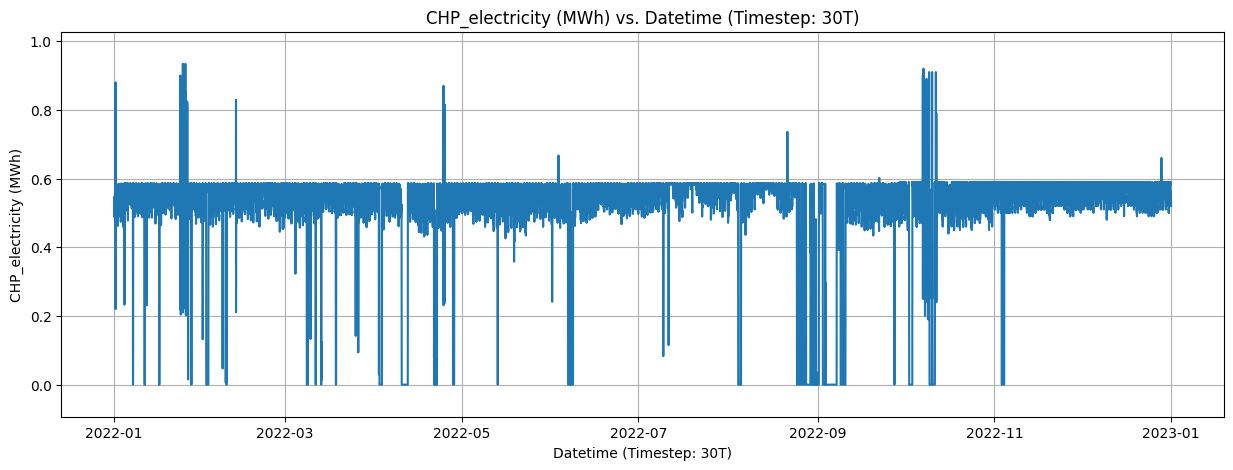

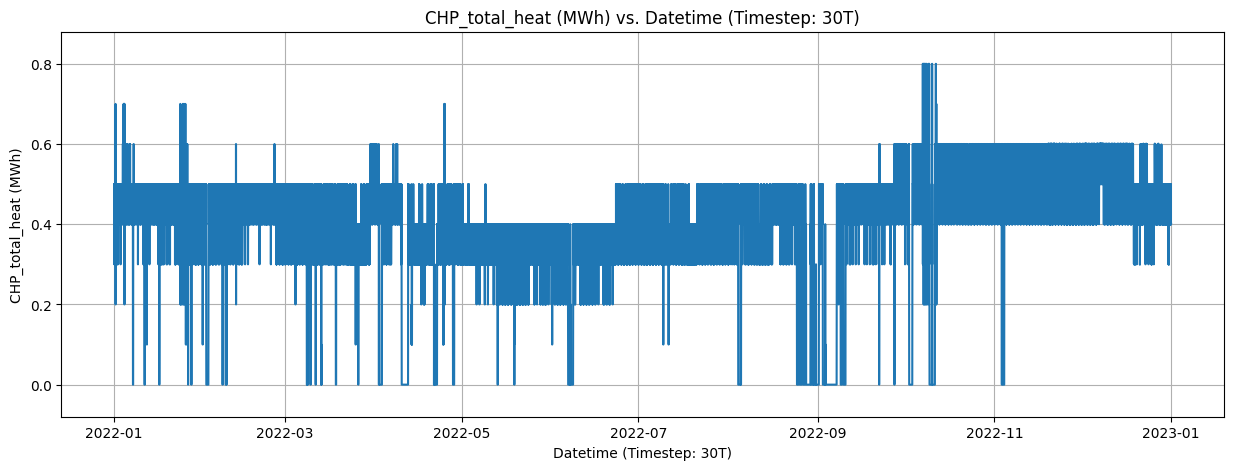

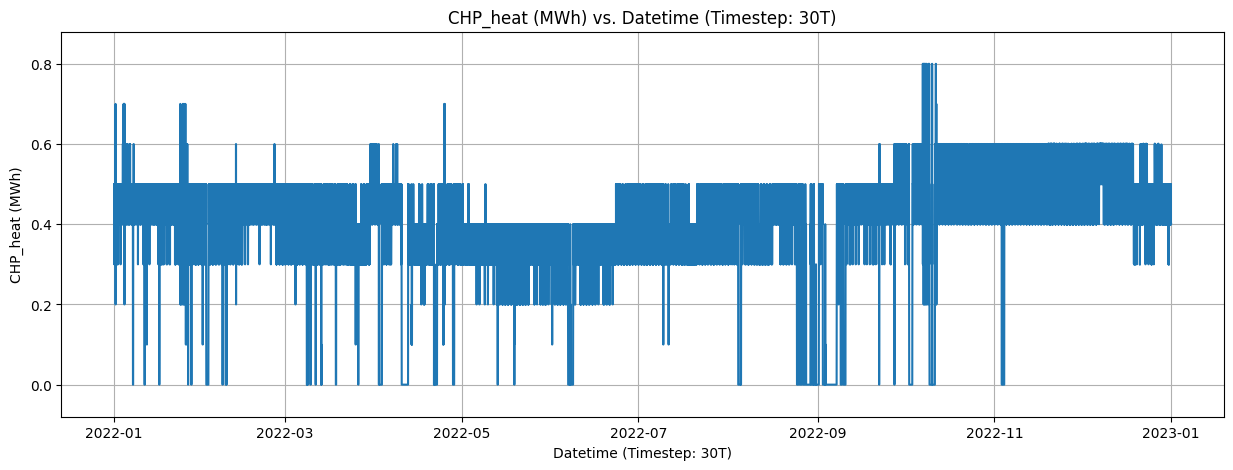

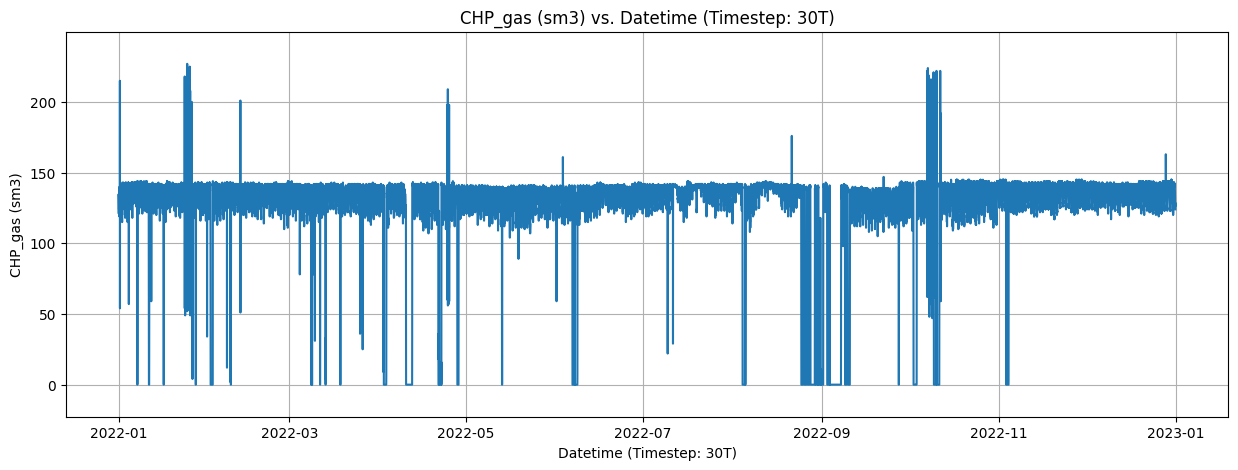

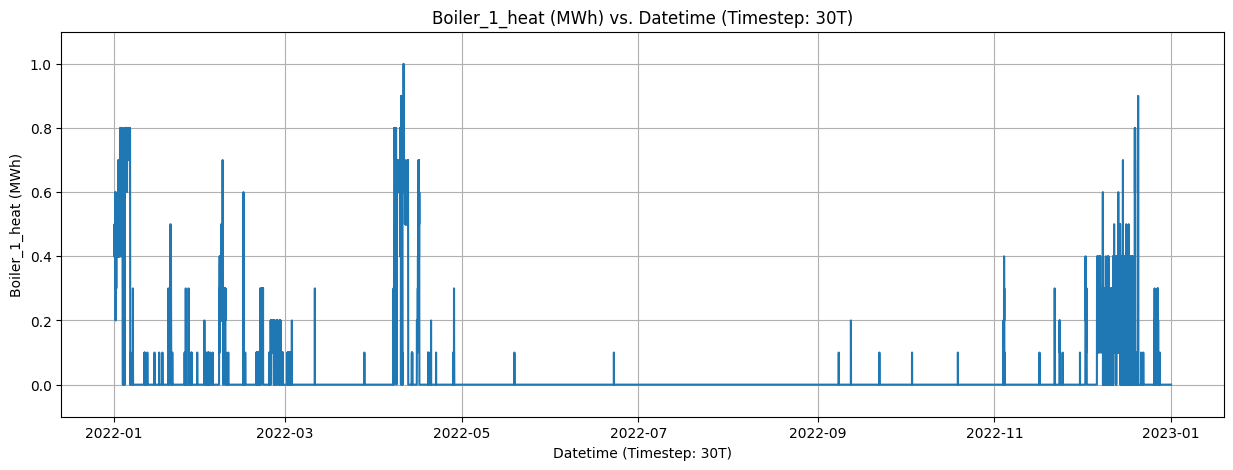

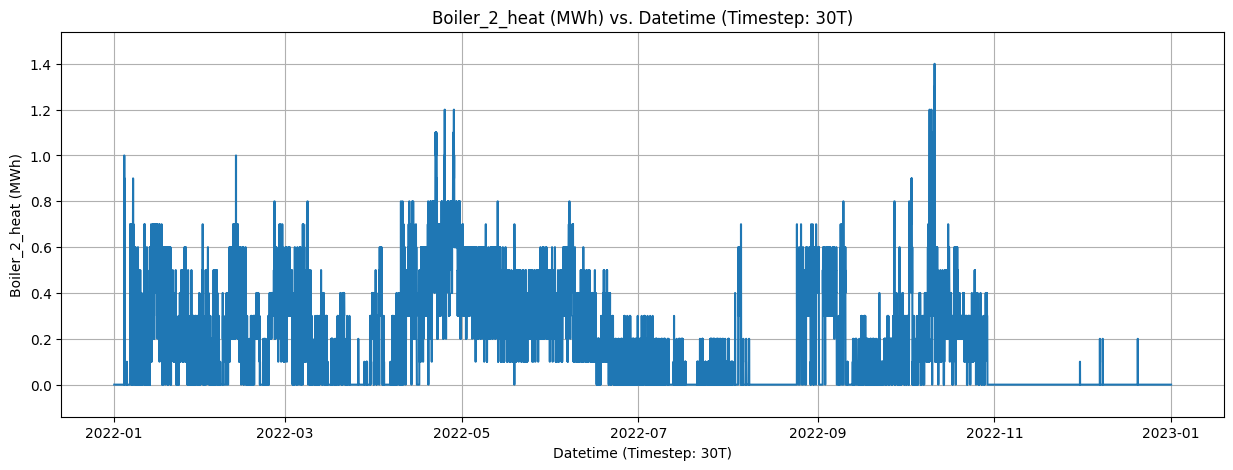

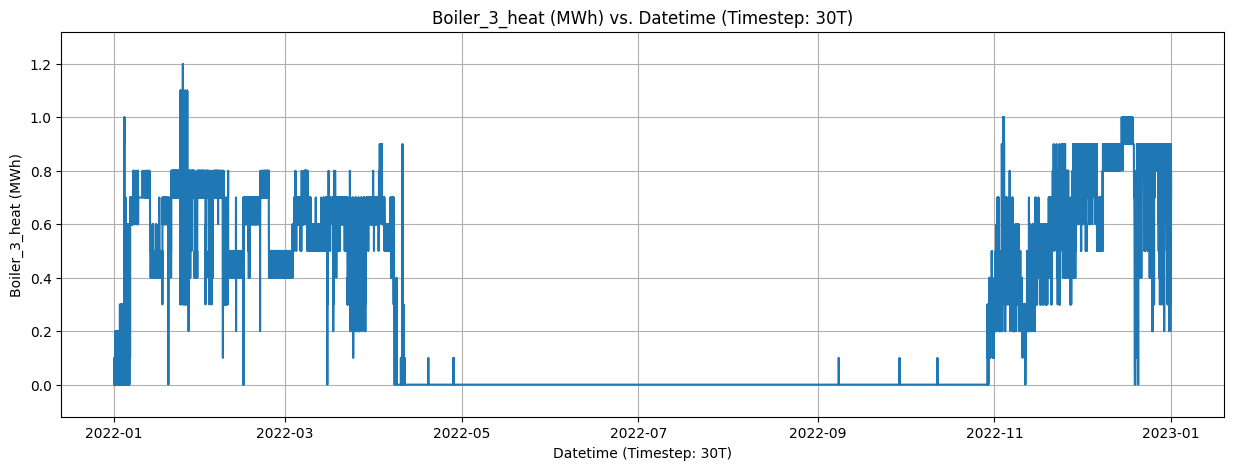

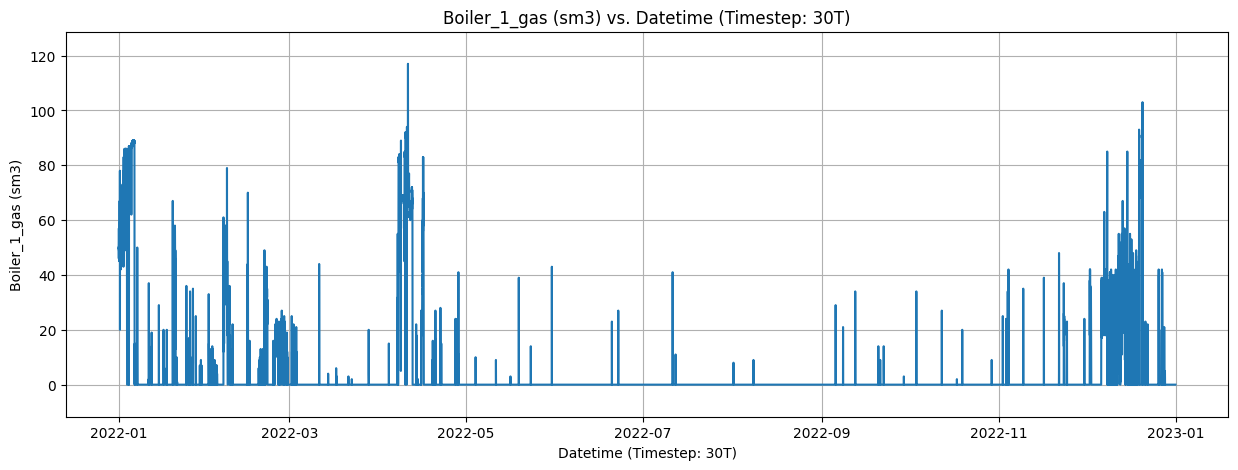

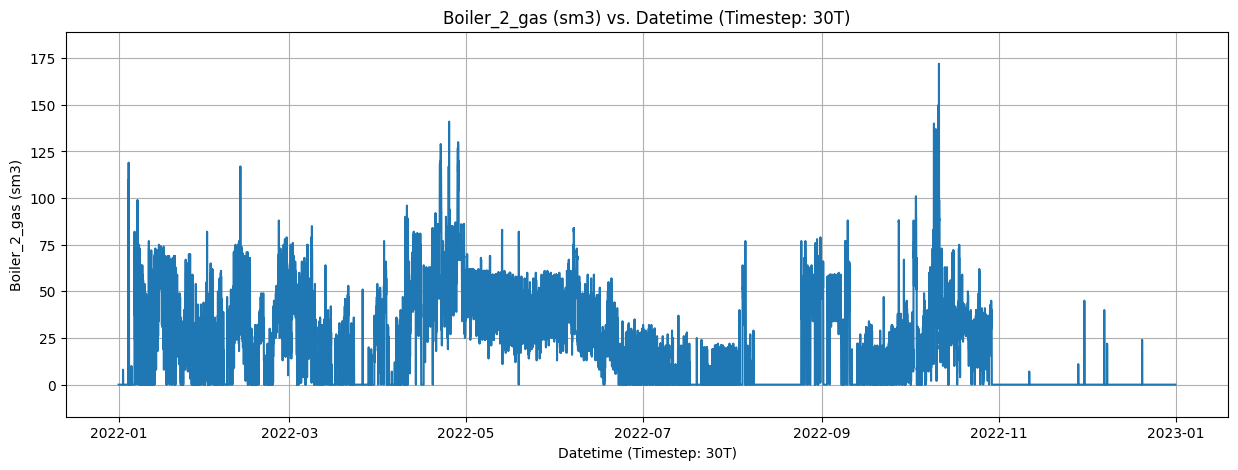

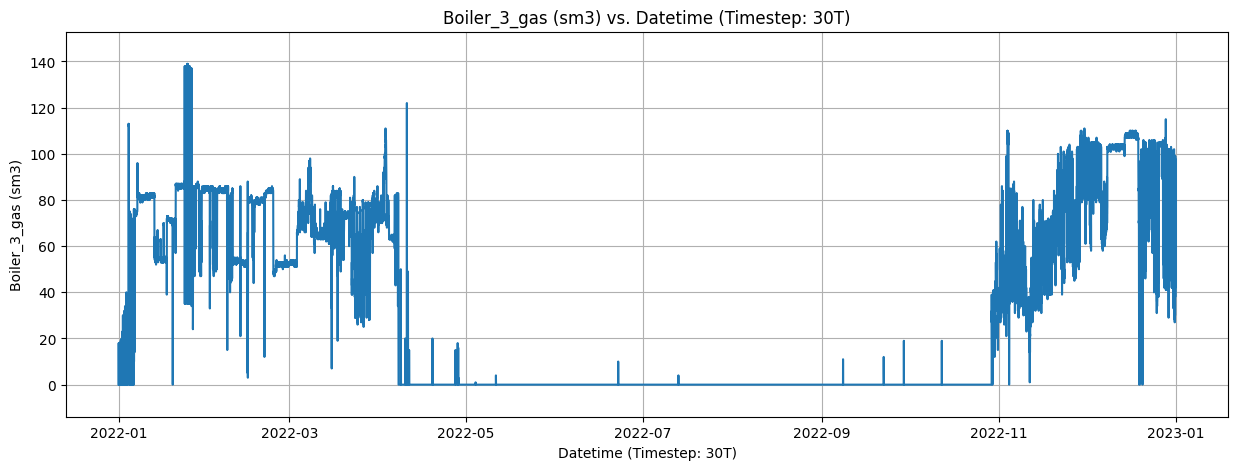

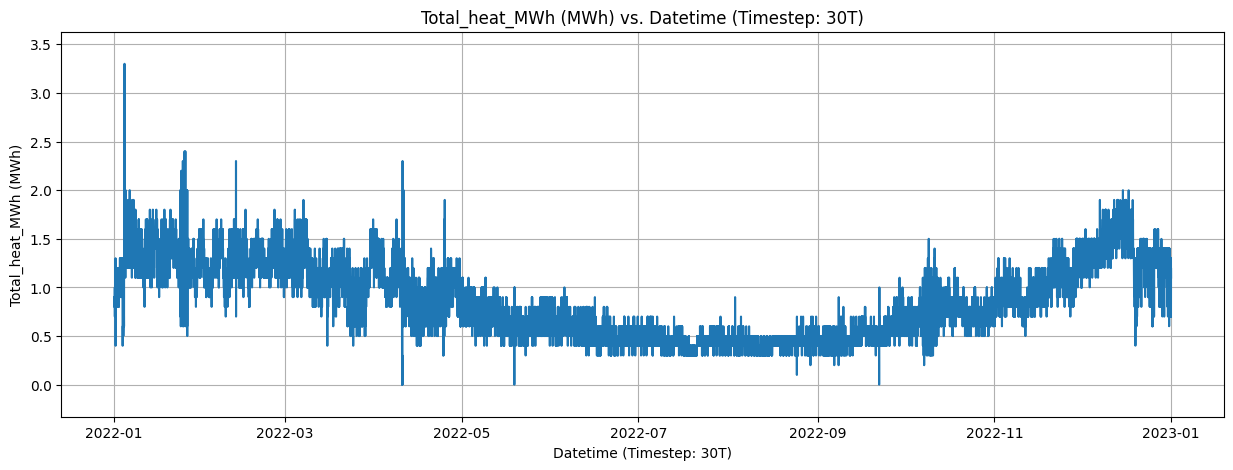

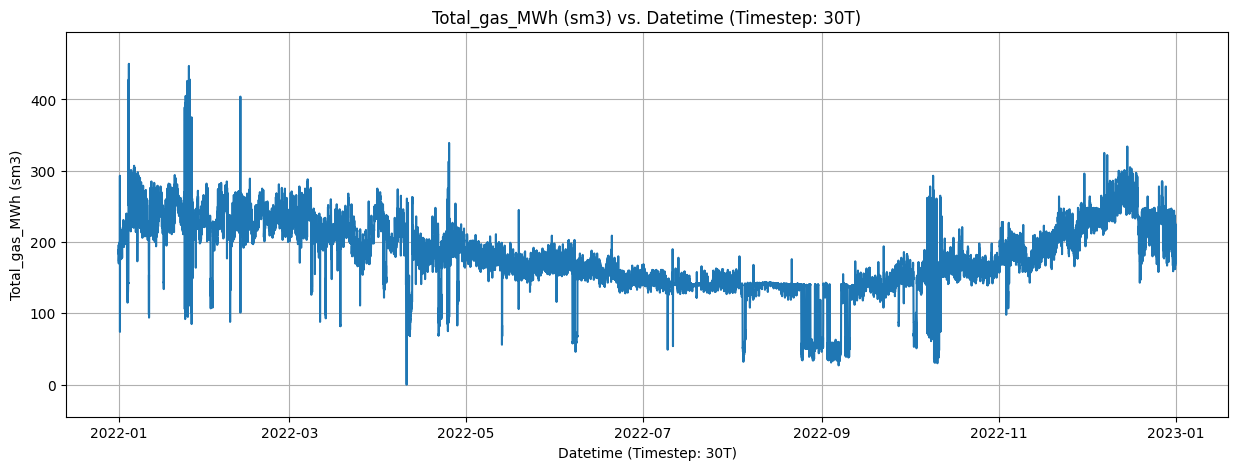

In [14]:
for i in range(len(column_lists)):
    column_lists[i].plot_all()